In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/' #2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml') #2018_2021_global_m5_catalog.xml')
dists = []

In [4]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [5]:
for eq_name in eq_with_data[0:1]:
    print(eq_name)

20190131_194949.a


In [6]:
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

In [7]:
iv2 = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [9]:
eq_no = 0
for eq_name in eq_with_data[0:500]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break

    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    print('data read')
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    print('start for')
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            from obspy import UTCDateTime
            IV2 = []
            count = 0
            for i in range(0, len(data)):
                if data[i].stats.channel[2] == 'Z':
                    tr = data[i].copy()
                    station = tr.stats.station
                    station = station.ljust(4)
                    sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                    sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                    distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110
                    tr_name = tr.stats.network+'.'+tr.stats.station+'.'+tr.stats.location
                    
                    if tr_name in picks.keys() and distance < 200:
                        # load saved parameters
                        tr.remove_response(inv)
                        pick = picks[tr_name]
                        pick = UTCDateTime(picks[tr_name])
                        pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))                            
                        
                        snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                        sampling_rate = tr.stats.sampling_rate
                        if snr>10:
                            start = int((pick - tr.stats.starttime)*sampling_rate)
                            end = int(start + 3 * sampling_rate)

                            vel = tr.copy()
                            #vel.trim(start, end)
                            v2 = vel.copy()
                            v2.data = vel.data[start:end]**2
                            iv2_this = v2.integrate()
                            print(iv2_this.data[-1])
                            current = iv2[eq_mag_str][int(distance//25)]
                            current.append(iv2_this.data[-1])
                            iv2[eq_mag_str][int(distance//25)]= current
                            counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
                            #vel_HP = vel.copy() # V_HP
            

0 out of 6077
data read
start for
8.3060018694e-10
5.23474235573e-09
7.03519253033e-09
8.3060018694e-10
5.23474235573e-09
7.03519253033e-09
8.3060018694e-10
5.23474235573e-09
7.03519253033e-09
1 out of 6077
data read
start for
2 out of 6077
data read
start for
3 out of 6077
data read
start for
4 out of 6077
data read
start for
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.93210636979e-10
7.59375980206e-11
9.60502766074e-11
2.38862037752e-10
2.96354019287e-11
1.60953753288e-11
3.97607323966e-10
6.932

9.37472981386e-11
3.416173411e-10
1.38786512866e-09
1.52565942957e-11
3.91270940574e-10
2.13097142312e-11
3.19438682374e-11
1.86533571226e-09
5.17451335736e-10
1.42741241363e-10
8.17646249143e-09
1.52198561136e-10
2.19096460964e-10
4.08265619129e-11
3.76305883515e-11
7.65950385457e-11
5.17664592122e-10
1.31181023857e-09
5.89011382849e-11
1.5661214375e-11
5.10293866674e-11
2.48102753796e-11
1.03411501871e-10
6.59998881629e-09
2.31247148499e-10
3.37492085542e-11
2.95236497099e-10
4.4877454139e-10
2.47216219415e-11
7.61907369503e-11
5.76482216437e-11
4.61560449372e-08
4.75185568933e-08
1.45746783463e-11
2.64307314356e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
4.76186351175e-10
3.21325255183e-10
4.84750937657e-09
9.53344964205e-11
3.45737493273e-11
3.61190864957e-11
4.4742846199e-11
1.95797975614e-11
2.49474529277e-11
4.35328231728e-11
1.63452925032e-11
1.41379788606e-11
4.17476791612e-11
3.42938876793e-11
4.37176994986e-11
8.61297800718e-11
1.54082634567e-11
4.4474673446e-11
1.85556011719e-10
9.30403394566e-12
9.23577774583e-10
2.36787913573e-11
7.67180073387e-08
1.13817169738e-10
3.79190420664e-10
1.66135267818e-11
1.29874781285e-10
3.81448411109e-10
6.3963941925e-11
2.41382077458e-11
4.53255079978e-11
6.40279813447e-12
4.54020506066e-12
3.37477643795e-10
3.65681603585e-11
4.41251770206e-11
1.83614534054e-10
3.18984956723e-09
6.44047591142e-11
1.22903913028e-10
6.69805305748e-11
2.00764227839e-11

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.76321538926e-09
1.02404590537e-10
2.74006784126e-11
1.11321417486e-10
1.03209144047e-09
1.28808500704e-09
2.68606719881e-10
2.54587470991e-11
2.9199658844e-11
1.01214770049e-10
1.32459568818e-10
1.0078185483e-09
3.6227942689e-10
9.1387634274e-11
19 out of 6077
data read
start for
20 out of 6077
data read
start for
21 out of 6077
data read
start for
1.39135304498e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.18508640256e-09
1.39135304498e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.18508640256e-09
22 out of 6077
data read
start for
23 out of 6077
data read
start for
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697e-11
4.56587310257e-11
1.71268847745e-11
2.35975237147e-11
1.41502042466e-10
1.06413874342e-07
2.94628582159e-09
6.91755076512e-11
4.4208212459e-1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
1.56881541048e-09
4.55356217139e-11
1.77738906616e-08
1.66412160771e-11
2.67926947587e-10
1.03217719632e-10
1.06288337116e-10
1.30258151767e-10
4.85633297439e-11
6.89060046396e-11
1.97299365935e-10
5.08781352549e-11
5.62063142158e-11
7.47996314699e-11
7.0821231025e-11
1.46370061091e-10
2.12970336363e-10
4.80455440338e-11
8.22789431898e-11
9.36203571083e-10
5.47450166103e-11
1.42326510289e-09
4.49476776414e-10
6.24470403061e-10
1.57241069388e-09
2.05516696208e-10
7.84491798184e-12
1.76237412097e-11
9.58258276282e-11
9.24384764988e-10
1.99530662831e-10
2.62538609001e-10
1.4951628218e-10
9.96909267868e-11
4.9846484944e-10
9.59531128366e-11
5.51690757934e-11
1.00790403804e-09
6.45848285349e-10
4.80327171324e-10
1.15208687677e-09
4.61530616677e-10
3.02840309697

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.57811392504e-09
8.85425126003e-11
1.18709044141e-10
4.69633655753e-10
1.09723723482e-10
6.68625779499e-10
7.64801341574e-11
4.33760803915e-11
9.23754796788e-11
4.72032893932e-10
1.29085744696e-10
1.00613572746e-10
6.15647130079e-10
1.02201038001e-10
3.17093479912e-10
8.42032408399e-10
1.3382941494e-10
4.03114583607e-11
1.92258422962e-09
1.77522790119e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.46320666643e-10
5.15663914585e-10
1.23001043076e-09
2.03162785907e-09
2.68021569227e-09
1.04692111064e-09
5.17328139037e-11
8.72543103154e-11
2.42277869272e-10
1.52132206538e-09
5.87056186296e-10
1.05941011347e-09
1.49590919723e-10
24 out of 6077
data read
start for


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


7.31523765716e-11
25 out of 6077
data read
start for
26 out of 6077
data read
start for
9.65265248771e-08
4.73699478295e-07
9.65265248771e-08
4.73699478295e-07
27 out of 6077
data read
start for
28 out of 6077
data read
start for
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934391855e-10
1.1324938888e-09
1.17057955797e-11
1.31007430171e-11
1.03751657393e-10
5.44921670173e-10
5.13728388818e-09
1.12803474235e-10
4.1934

1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09
3.69201274969e-08
1.70516248e-10
5.66741876078e-10
7.56635200923e-08
2.44411800444e-10
4.58922837595e-10
2.73995568349e-10
2.0754354506e-10
1.84277289953e-09
1.0831871169e-10
4.08446093519e-09


6.54092051222e-12
6.0540553638e-11
4.88428454879e-10
2.25515263742e-11
5.30353367047e-11
7.55609073052e-11
47 out of 6077
data read
start for
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.12097218451e-11
1.30037339276e-09
4.55016788123e-10
1.5254887422e-10
2.1801081601e-09
4.40222243141e-11
2.68676817844e-11
3.120972

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.94047026929e-08
1.50783551121e-09
6.92764249997e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.94047026929e-08
1.50783551121e-09
6.92764249997e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.94047026929e-08
1.50783551121e-09
6.92764249997e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


51 out of 6077
data read
start for
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10
6.9792756817e-08
2.72883982596e-08
1.93225646651e-10
1.95840688046e-10
5.92373717945e-11
7.12161483366e-11
7.12060597199e-11
7.72204433888e-10
3.26600250312e-10

2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-

1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e

3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-

9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e

9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10

4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-

3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12
3.54042972352e-12
6.41596697313e-12
3.59217392178e-12
2.29999619623e-10
1.75622883846e-08
1.09605476324e-11
1.09003530809e-10
5.08434224464e-09
1.11182463268e-10
2.91437741504e-11
9.07396844183e-10
5.43680827472e-11
3.06276536277e-11
4.9552881873e-11
1.55611533416e-09
6.60536778307e-11
1.27944374489e-10
6.51938376667e-11
1.97133463583e-10
3.45046450616e-12
8.51193201481e-12
9.79788930557e-10
1.02405256381e-09
2.91841977026e-11
2.36700949201e-10
4.64247713788e-09
9.88854423469e-10
8.22481563827e-09
1.68873924737e-11
5.96369891587e-12
1.23517352564e-08
1.46107615211e-10
3.64494284377e-10
4.84127337803e-10
5.46490067823e-11
6.67375383102e-12
7.94654345211e-12
4.11386643175e-12
4.91416994427e-12
9.80764052771e-12
6.0321018382e-12
5.48659429791e-12
8.2481238663e-12
9.0949847986e-12

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.73960939608e-07
2.96020582612e-09
3.86014083843e-08
2.52536144691e-09
59 out of 6077
data read
start for
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
3.80741554793e-10
7.15846773823e-11
7.94615528003e-11
60 out of 6077
data read
start for
8.40596858718e-08
61 out of 6077
data read
start for
3.49060063978e-09
2.50291161195e-09
7.73108026666e-10
2.05273045996e-08
2.72689047959e-09
2.53810875085e-09
1.47124671216e-09
2.3092935298e-09
2.80322575564e-09
4.56101212759e-09
5.92730765013e-09
4.09398314441e-09
1.06529297276e-09
2.40158570732e-09
9.86070706469e-10
9.12441070184e-10
3.49060063978e-09
2.50291161195e-09
7.73108026666e-10
2.05273045996e-08
2.72689047959e-09
2.53810875085e-09
1.47124671216e-09
2.3092935298e-09
2.80322575564e-09
4.56101212759e-09
5.92730765013e-

1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-10
1.71162138008e-11
1.40761420978e-10
2.24926609633e-11
3.07837230962e-11
2.2041533688e-09
5.95337287333e-11
8.12485911535e-10
7.55318193503e-11
3.00213581143e-10
2.21716956296e-11
1.10906154118e-

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
4.60950134024e-10
3.60203662526e-10
4.60950134024e-10
3.60203662526e-10
77 out of 6077
data read
start for
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-11
2.07317309447e-10
1.87578205037e-10
6.06504247081e-10
2.22140468483e-11
4.34611918028e-10
1.35420534161e-11
1.25853528987e-09
4.17754296569e-11
9.2683353599e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.45863279967e-09
80 out of 6077
data read
start for
81 out of 6077
data read
start for
4.23047076101e-08
1.31672746295e-08
4.23047076101e-08
1.31672746295e-08
4.23047076101e-08
1.31672746295e-08
4.23047076101e-08
1.31672746295e-08
82 out of 6077
data read
start for
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
2.26458368949e-09
7.84011169958e-08
5.52170927424e-09
3.89384279707e-08
2.55873200389e-09
83 out of 6077
data read
start for
2.31636018054e-08
84 out of 6077
data read
start for
2.66337704413e-08
1.3742735743e-09
1.12594271984e-07
1.95453202954e-09
8.74609522253e-10
1.89844697882e-09
7.78940820448e-10
3.03506748625e-09
1.5271173709e-09
4.9304340355e-09
1.77893802269e-10


1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035390755e-11
4.0615205235e-11
9.85510527435e-10
1.30005840415e-10
1.352677131e-10
1.25011861948e-11
2.69583572483e-11
2.08198100411e-11
1.20667307556e-10
2.01178658481e-11
1.95513254075e-11
3.61035

9.63494293809e-09
1.50592117893e-07
4.22547077092e-09
2.0173220705e-08
2.96141455009e-09
4.55128840507e-09
2.1858552941e-09
4.42443312524e-08
1.85858864953e-09
7.21682848186e-08
5.19641616044e-09
2.51328510978e-09
1.83323499066e-07
3.45268042242e-09
9.63494293809e-09
1.50592117893e-07
4.22547077092e-09
2.0173220705e-08
2.96141455009e-09
4.55128840507e-09
2.1858552941e-09
4.42443312524e-08
1.85858864953e-09
91 out of 6077
data read
start for
92 out of 6077
data read
start for
93 out of 6077
data read
start for
94 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

data read
start for
95 out of 6077
data read
start for
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06
2.48010967615e-08
3.71444405607e-09
1.28616927022e-09
8.1856010325e-11
8.45310988865e-10
4.39515415137e-11
1.11093262496e-06

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
2.58973485217e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.22768050686e-09
2.14001015045e-10
97 out of 6077
data read
start for
1.72183217085e-08
2.99716939164e-10
1.0834856098e-08
1.72183217085e-08
2.99716939164e-10
1.0834856098e-08
1.72183217085e-08
2.99716939164e-10
1.0834856098e-08
98 out of 6077
data read
start for
99 out of 6077
data read
start for
2.61506142913e-11
100 out of 6077
data read
start for
5.5418876528e-08
4.45012957583e-10
4.04954388351e-08
5.5418876528e-08
4.45012957583e-10
4.04954388351e-08
5.5418876528e-08
4.45012957583e-10
4.04954388351e-08
101 out of 6077
data read
start for
102 out of 6077
data read
start for
1.80019454033e-11
1.22850239011e-10
1.01753373501e-08
1.72672513895e-09
5.60257794079e-11
9.15639764976e-12
6.80389310078e-12
3.92952986442e-08
2.60781553348e-09
7.84141089831e-11
8.26519895185e-11
1.68575992046e-06
1.10725705792e-11
2.08622606134e-11
1.12228604219e-10
4.37403868888e-10
1.62140904674e-10
1.49861113799e-10
1.90644914327e-10
1.91759236766e-11
8.21301444501e-10
4.57110993564e-10
9.29182682564e-09
3

3.99201670832e-10
7.05319712993e-11
1.80019454033e-11
1.22850239011e-10
1.01753373501e-08
1.72672513895e-09
5.60257794079e-11
9.15639764976e-12
6.80389310078e-12
3.92952986442e-08
2.60781553348e-09
7.84141089831e-11
8.26519895185e-11
1.68575992046e-06
1.10725705792e-11
2.08622606134e-11
1.12228604219e-10
4.37403868888e-10
1.62140904674e-10
1.49861113799e-10
1.90644914327e-10
1.91759236766e-11
8.21301444501e-10
4.57110993564e-10
9.29182682564e-09
3.99201670832e-10
7.05319712993e-11
1.80019454033e-11
1.22850239011e-10
1.01753373501e-08
1.72672513895e-09
5.60257794079e-11
9.15639764976e-12
6.80389310078e-12
3.92952986442e-08
2.60781553348e-09
7.84141089831e-11
8.26519895185e-11
1.68575992046e-06
1.10725705792e-11
2.08622606134e-11
1.12228604219e-10
4.37403868888e-10
1.62140904674e-10
1.49861113799e-10
1.90644914327e-10
1.91759236766e-11
8.21301444501e-10
4.57110993564e-10
9.29182682564e-09
3.99201670832e-10
7.05319712993e-11
1.80019454033e-11
1.22850239011e-10
1.01753373501e-08
1.72672513

6.80389310078e-12
3.92952986442e-08
2.60781553348e-09
7.84141089831e-11
8.26519895185e-11
1.68575992046e-06
1.10725705792e-11
2.08622606134e-11
1.12228604219e-10
4.37403868888e-10
1.62140904674e-10
1.49861113799e-10
1.90644914327e-10
1.91759236766e-11
8.21301444501e-10
4.57110993564e-10
9.29182682564e-09
3.99201670832e-10
7.05319712993e-11
1.80019454033e-11
1.22850239011e-10
1.01753373501e-08
1.72672513895e-09
5.60257794079e-11
9.15639764976e-12
6.80389310078e-12
3.92952986442e-08
2.60781553348e-09
7.84141089831e-11
8.26519895185e-11
1.68575992046e-06
1.10725705792e-11
2.08622606134e-11
1.12228604219e-10
4.37403868888e-10
1.62140904674e-10
1.49861113799e-10
1.90644914327e-10
1.91759236766e-11
8.21301444501e-10
4.57110993564e-10
9.29182682564e-09
3.99201670832e-10
7.05319712993e-11
1.80019454033e-11
1.22850239011e-10
1.01753373501e-08
1.72672513895e-09
5.60257794079e-11
9.15639764976e-12
6.80389310078e-12
3.92952986442e-08
2.60781553348e-09
7.84141089831e-11
8.26519895185e-11
1.68575992

3.9692142151e-10
7.51587824743e-11
1.79609404207e-11
1.2279876159e-10
9.91539756831e-09
1.97966585543e-09
5.68073618446e-11
9.15532274131e-12
6.88890216449e-12
7.55595095041e-08
2.60541942407e-09
7.84705953139e-11
7.9483004373e-11
1.69750153266e-06
1.11149362063e-11
2.08806362502e-11
1.1229031291e-10
4.26962369394e-10
1.63320730914e-10
1.76463490677e-10
2.03032988772e-10
2.29871549064e-11
7.12427686177e-09
8.32650930741e-12
4.85535357984e-10
1.21232500685e-08
3.9692142151e-10
7.51587824743e-11
1.79609404207e-11
1.2279876159e-10
9.91539756831e-09
1.97966585543e-09
5.68073618446e-11
9.15532274131e-12
6.88890216449e-12
7.55595095041e-08
2.60541942407e-09
7.84705953139e-11
7.9483004373e-11
1.69750153266e-06
1.11149362063e-11
2.08806362502e-11
1.1229031291e-10
4.26962369394e-10
1.63320730914e-10
1.76463490677e-10
2.03032988772e-10
2.29871549064e-11
7.12427686177e-09
8.32650930741e-12
4.85535357984e-10
1.21232500685e-08
3.9692142151e-10
7.51587824743e-11
1.79609404207e-11
1.2279876159e-10
9.

1.63320730914e-10
1.76463490677e-10
2.03032988772e-10
2.29871549064e-11
7.12427686177e-09
8.32650930741e-12
4.85535357984e-10
1.21232500685e-08
3.9692142151e-10
7.51587824743e-11
1.79609404207e-11
1.2279876159e-10
9.91539756831e-09
1.97966585543e-09
5.68073618446e-11
9.15532274131e-12
6.88890216449e-12
7.55595095041e-08
2.60541942407e-09
7.84705953139e-11
7.9483004373e-11
1.69750153266e-06
1.11149362063e-11
2.08806362502e-11
1.1229031291e-10
4.26962369394e-10
1.63320730914e-10
1.76463490677e-10
2.03032988772e-10
2.29871549064e-11
7.12427686177e-09
8.32650930741e-12
4.85535357984e-10
1.21232500685e-08
3.9692142151e-10
7.51587824743e-11
1.79609404207e-11
1.2279876159e-10
9.91539756831e-09
1.97966585543e-09
5.68073618446e-11
9.15532274131e-12
6.88890216449e-12
7.55595095041e-08
2.60541942407e-09
7.84705953139e-11
7.9483004373e-11
1.69750153266e-06
1.11149362063e-11
2.08806362502e-11
1.1229031291e-10
4.26962369394e-10
1.63320730914e-10
1.76463490677e-10
2.03032988772e-10
2.29871549064e-11


3.13968947731e-08
9.31953538662e-10
2.03448513428e-08
5.35129825123e-09
1.08549103993e-09
1.47394184635e-09
2.51877390066e-08
1.24714899084e-08
2.50079758485e-07
1.1853352707e-08
7.16917567278e-09
2.90680601012e-08
4.86348254096e-09
1.64033647956e-08
1.04553372093e-09
4.83917514954e-09
5.70865416564e-09
1.02141561394e-09
8.74974211137e-09
3.13968947731e-08
106 out of 6077
data read
start for
9.024847058e-09
1.01042237768e-09
9.024847058e-09
1.01042237768e-09
9.024847058e-09
1.01042237768e-09
107 out of 6077
data read
start for
2.23948153169e-09
108 out of 6077
data read
start for
5.47149232262e-11
5.47149232262e-11
5.47149232262e-11
109 out of 6077
data read
start for
2.53424752343e-11
1.90015037634e-09
2.40020391611e-10
1.30823009239e-08
4.15954750058e-10
1.93933102504e-11
3.30633551925e-07
6.62001916061e-11
7.88872760191e-11
8.39111759276e-10
3.52339580295e-09
1.15001852619e-11
2.53424752343e-11
1.90015037634e-09
2.40020391611e-10
1.30823009239e-08
4.15954750058e-10
1.93933102504e-11

3.52339580295e-09
1.15001852619e-11
2.53424752343e-11
1.90015037634e-09
2.40020391611e-10
1.30823009239e-08
4.15954750058e-10
1.93933102504e-11
3.30633551925e-07
6.62001916061e-11
7.88872760191e-11
8.39111759276e-10
3.52339580295e-09
1.15001852619e-11
2.53424752343e-11
1.90015037634e-09
2.40020391611e-10
1.30823009239e-08
4.15954750058e-10
1.93933102504e-11
3.30633551925e-07
6.62001916061e-11
7.88872760191e-11
8.39111759276e-10
3.52339580295e-09
1.15001852619e-11
110 out of 6077
data read
start for
9.58534380689e-08
1.00155602555e-09
2.07451075783e-07
9.58534380689e-08
1.00155602555e-09
2.07451075783e-07
9.58534380689e-08
1.00155602555e-09
2.07451075783e-07
111 out of 6077
data read
start for


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112 out of 6077
data read
start for
113 out of 6077
data read
start for
8.82778227543e-09
3.34992804147e-08
2.39788918551e-09
1.50567284226e-08
3.79693267982e-09
4.47556344455e-09
1.44943751852e-09
5.80659599595e-09
2.88142423549e-09
4.46894527753e-08
8.66944560342e-09
4.92386988945e-09
5.34409522044e-09
2.36252198359e-09
1.39901321864e-09
8.82778227543e-09
3.34992804147e-08
2.39788918551e-09
1.50567284226e-08
3.79693267982e-09
4.47556344455e-09
1.44943751852e-09
5.80659599595e-09
2.88142423549e-09
4.46894527753e-08
8.66944560342e-09
4.92386988945e-09
5.34409522044e-09
2.36252198359e-09
1.39901321864e-09
8.82778227543e-09
3.34992804147e-08
2.39788918551e-09
1.50567284226e-08
3.79693267982e-09
4.47556344455e-09
1.44943751852e-09
5.80659599595e-09
2.88142423549e-09
4.46894527753e-08
8.66944560342e-09
4.92386988945e-09
5.34409522044e-09
2.36252198359e-09
1.39901321864e-09
8.82778227543e-09
3.34992804147e-08
2.39788918551e-09
1.50567284226e-08
3.79693267982e-09
4.47556344455e-09
1.44943751

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
8.20733980822e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.46642936153e-10
7.78469002339e-11
1.08339876623e-10
1.04678460624e-10
7.50525266508e-10
119 out of 6077
data read
start for
5.96086087046e-10
3.47987385158e-10
3.92690931097e-12
5.96086087046e-10
3.47987385158e-10
3.92690931097e-12
5.96086087046e-10
3.47987385158e-10
3.92690931097e-12
5.96086087046e-10
3.47987385158e-10
3.92690931097e-12
120 out of 6077
data read
start for
121 out of 6077
data read
start for
122 out of 6077
data read
start for
1.2191872649e-10
7.57251952537e-10
1.2191872649e-10
7.57251952537e-10
1.2191872649e-10
7.57251952537e-10
1.2191872649e-10
7.57251952537e-10
1.2191872649e-10
7.57251952537e-10
1.2191872649e-10
7.57251952537e-10
1.2191872649e-10
7.57251952537e-10
123 out of 6077
data read
start for
124 out of 6077
data read
start for
2.90558988756e-11
6.30411389797e-11
8.65764506579e-12
1.02273102118e-11
2.90558988756e-11
6.30411389797e-11
8.65764506579e-12
1.02273102118e-11
2.90558988756e-11
6.30411389797e-11
8.65764506579e-12
1.02273102118e-11
2.90558988756e-11

5.33365091528e-12
6.39024643955e-10
5.23948405358e-10
3.18606340879e-10
4.92300176836e-11
2.65044215332e-10
1.01030742453e-09
5.33365091528e-12
6.39024643955e-10
5.23948405358e-10
3.18606340879e-10
4.92300176836e-11
2.65044215332e-10
1.01030742453e-09
5.33365091528e-12
140 out of 6077
data read
start for
9.20855379612e-10
141 out of 6077
data read
start for
6.44989359358e-11
142 out of 6077
data read
start for
1.7051619747e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.93738820942e-12
1.7051619747e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.93738820942e-12
143 out of 6077
data read
start for
144 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
145 out of 6077
data read
start for
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.5483963428e-11
1.67202934029e-11
3.09544359037e-11
2.0714848212e-11
1.51018728674e-10
1.60696492606e-10
1.63739478272e-11
2.548

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

data read
start for
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
1.39486542935e-09
5.1245200167e-11
5.64534796719e-10
1.36892685409e-10
2.27807489949e-10
2.06073503046e-10
150 out of 6077
data read
start for
3.26808862293e-12
1.29070495589e-11
3.64678396807e-11
3.2250350951e-11
3.79974541399e-12

3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-0

2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11

6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09

1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-1

1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-0

4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-0

1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-11
3.75390393204e-11
1.1264278141e-11
1.76771498562e-11
7.37692953453e-11
1.26356391439e-10
1.72051477695e-09
4.20502131859e-10
9.40105482616e-11
7.88547390262e-11
2.01758909877e-09
4.55987147147e-08
9.14550071953e-10
1.43779634133e-10
3.22838526954e-11
6.5230005911e-09
7.740847252e-11
6.8886677684e-11
8.92672259899e-11
1.31819022964e-10
3.55003454794e-11
9.81173331642e-12
1.02559506526e-11
3.77873183499e-09
4.22229590532e-10
1.49952372919e-10
4.90605942243e-10
3.83791561574e-10
4.49451846428e-11
9.98702990446e-11
1.69526406214e-09
2.18702847694e-11
1.43581503406e-11
1.29155622784e-09
1.3242992701e-10
3.95195227885e-08
1.38665083789e-10
9.94795099965e-11
2.41168926738e-10
6.70080892477e-11
1.82408113061e-11
2.31884378792e-11
1.17699204325e-11
1.36534134353e-11
2.18351189507e-11
1.04249296036e-11
1.13297855431e-11
2.46893212274e-11
1.43526992675e-11
1.65948579644e-1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.7103907498e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.7103907498e-09
159 out of 6077
data read
start for
1.02918976227e-11
1.02918976227e-11
1.02918976227e-11
1.02918976227e-11
1.02918976227e-11
160 out of 6077
data read
start for
3.04988576473e-10
3.78273066953e-09
2.23724662347e-10
5.00242407744e-10
3.23484289446e-11
3.11888953664e-10
2.41223578671e-10
1.94664653617e-10
2.15375064995e-11
4.14125011435e-11
3.30539386099e-10
5.03207417778e-12
1.61516365306e-11
1.64505865011e-11
3.04988576473e-10
3.78273066953e-09
2.23724662347e-10
5.00242407744e-10
3.23484289446e-11
3.11888953664e-10
2.41223578671e-10
1.94664653617e-10
2.15375064995e-11
4.14125011435e-11
3.30539386099e-10
5.03207417778e-12
1.61516365306e-11
1.64505865011e-11
3.04988576473e-10
3.78273066953e-09
2.23724662347e-10
5.00242407744e-10
3.23484289446e-11
3.11888953664e-10
2.41223578671e-10
1.94664653617e-10
2.15375064995e-11
4.14125011435e-11
3.30539386099e-10
5.03207417778e-12
1.61516365306e-11
1.64505865011e-11
3.04988576473e-10
3.78273066953e-09
2.23724662347e-10
5.002424077

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


166 out of 6077
data read
start for
167 out of 6077
data read
start for
4.91662012039e-10
1.32821224003e-08
1.25249420518e-07
1.71167124621e-08
6.06077820484e-10
2.28823948894e-10
4.70604525539e-10
7.06629366902e-10
5.86721123241e-11
1.86624536875e-07
4.91662012039e-10
1.32821224003e-08
1.25249420518e-07
1.71167124621e-08
6.06077820484e-10
2.28823948894e-10
4.70604525539e-10
7.06629366902e-10
5.86721123241e-11
1.86624536875e-07
4.91662012039e-10
1.32821224003e-08
1.25249420518e-07
1.71167124621e-08
6.06077820484e-10
2.28823948894e-10
4.70604525539e-10
7.06629366902e-10
5.86721123241e-11
1.86624536875e-07
4.91662012039e-10
1.32821224003e-08
1.25249420518e-07
1.71167124621e-08
6.06077820484e-10
2.28823948894e-10
4.70604525539e-10
7.06629366902e-10
5.86721123241e-11
1.86624536875e-07
4.91662012039e-10
1.32821224003e-08
1.25249420518e-07
1.71167124621e-08
6.06077820484e-10
2.28823948894e-10
4.70604525539e-10
7.06629366902e-10
5.86721123241e-11
1.86624536875e-07
4.91662012039e-10
1.32821224

3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.7485787122

9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.5107703625

2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.6684012966

1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.89093411416e-11
2.16956436502e-10
2.66840129665e-09
9.07693559337e-11
3.51077036258e-10
2.74857871224e-12
9.04470551385e-12
7.50923999652e-10
2.81010258181e-11
1.07023813542e-10
2.47265040701e-11
1.11794774553e-10
1.56162590289e-08
9.97463777972e-11
8.45563043585e-12
1.02689188109e-11
6.23172468398e-12
6.77597256368e-12
6.27801384216e-12
9.83409845195e-12
1.1436866098e-11
1.18305871508e-11
9.68168830849e-12
4.79447862578e-12
2.80273084068e-11
2.07938320515e-10
1.23014569523e-10
1.8909341141

2.96774732954e-09
3.06643662846e-10
2.05639517636e-11
2.29825122551e-08
3.7883805933e-09
1.20673945279e-09
2.99232121284e-10
1.80727810651e-07
1.63873811104e-09
5.29776113052e-08
1.61057409277e-08
9.47587022592e-09
9.92762332387e-09
1.10953052897e-08
3.10292350494e-09
1.09677002682e-08
1.76329692774e-09
2.22522652612e-08
1.38157286636e-07
3.78903889357e-08
6.84428999005e-08
7.45501290427e-09
1.47204048925e-09
2.7906887285e-09
2.96774732954e-09
3.06643662846e-10
2.05639517636e-11
2.29825122551e-08
3.7883805933e-09
1.20673945279e-09
2.99232121284e-10
1.80727810651e-07
1.63873811104e-09
5.29776113052e-08
1.61057409277e-08
9.47587022592e-09
9.92762332387e-09
1.10953052897e-08
3.10292350494e-09
1.09677002682e-08
1.76329692774e-09
2.22522652612e-08
1.38157286636e-07
3.78903889357e-08
6.84428999005e-08
7.45501290427e-09
1.47204048925e-09
2.7906887285e-09
2.96774732954e-09
3.06643662846e-10
2.05639517636e-11
2.29825122551e-08
3.7883805933e-09
1.20673945279e-09
2.99232121284e-10
1.80727810651e-

7.37384803692e-10
2.48791819781e-09
8.0744791274e-11
1.68060093475e-09
1.19861897969e-09
4.34216413644e-10
1.14766659431e-08
4.77993977623e-09
3.5131651934e-10
2.36107929375e-09
5.03821772133e-10
5.00971963325e-10
5.9216858696e-09
7.37384803692e-10
2.48791819781e-09
8.0744791274e-11
1.68060093475e-09
1.19861897969e-09
4.34216413644e-10
1.14766659431e-08
4.77993977623e-09
3.5131651934e-10
2.36107929375e-09
5.03821772133e-10
5.00971963325e-10
5.9216858696e-09
7.37384803692e-10
2.48791819781e-09
8.0744791274e-11
1.68060093475e-09
1.19861897969e-09
4.34216413644e-10
1.14766659431e-08
4.77993977623e-09
3.5131651934e-10
2.36107929375e-09
5.03821772133e-10
5.00971963325e-10
5.9216858696e-09
7.37384803692e-10
2.48791819781e-09
8.0744791274e-11
1.68060093475e-09
1.19861897969e-09
4.34216413644e-10
1.14766659431e-08
4.77993977623e-09
3.5131651934e-10
2.36107929375e-09
5.03821772133e-10
5.00971963325e-10
5.9216858696e-09
7.37384803692e-10
2.48791819781e-09
8.0744791274e-11
1.68060093475e-09
1.198

1.96327752692e-09
5.40604038729e-10
2.54498031983e-09
2.8501285054e-09
9.62008343099e-10
8.99461521365e-09
8.762922539e-09
7.77587255771e-11
4.26921160792e-11
5.16673379058e-09
4.38001740713e-10
2.68029108745e-10
2.45484000905e-09
6.57622883119e-10
6.05893447875e-10
8.65579608381e-10
1.83902659184e-10
6.66479962767e-10
1.06482091679e-09
6.81810471272e-09
1.4472334493e-08
1.10656584014e-08
3.3594027364e-08
2.58077369409e-09
1.96327752692e-09
5.40604038729e-10
2.54498031983e-09
2.8501285054e-09
9.62008343099e-10
8.99461521365e-09
8.762922539e-09
7.77587255771e-11
4.26921160792e-11
5.16673379058e-09
4.38001740713e-10
2.68029108745e-10
2.45484000905e-09
6.57622883119e-10
6.05893447875e-10
8.65579608381e-10
1.83902659184e-10
6.66479962767e-10
1.06482091679e-09
6.81810471272e-09
1.4472334493e-08
1.10656584014e-08
3.3594027364e-08
2.58077369409e-09
1.96327752692e-09
5.40604038729e-10
2.54498031983e-09
2.8501285054e-09
9.62008343099e-10
8.99461521365e-09
8.762922539e-09
7.77587255771e-11
4.269

9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022203e-11
3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601992e-09
9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022203e-11
3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601992e-09
9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022203e-11
3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601992e-09
9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022

3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601992e-09
9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022203e-11
3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601992e-09
9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022203e-11
3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601992e-09
9.96710710528e-11
1.07658556151e-09
1.17415866346e-12
3.83249428198e-12
2.26216126348e-11
4.94504514505e-11
1.69860645226e-11
2.47982022203e-11
3.99659943853e-11
3.79241388239e-11
5.67945637825e-09
1.13606139968e-11
2.42184263593e-10
2.02972623721e-10
1.96767685289e-10
2.22541601

2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3

2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09


3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.

7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2

3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.

2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.0

3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11
1.06186769745e-09
1.27248269495e-08
1.25056334418e-09
7.07653860441e-11
2.1856599434e-11
6.28811519624e-09
1.62770603216e-11
8.27384194493e-12
8.13778315842e-11
2.82056647296e-11
3.02995922612e-11
2.76650320781e-11
1.200389131e-11
1.17668234456e-09
2.0172973655e-10
2.07594204923e-10
4.34829573556e-10
2.46965098888e-10
1.47540672449e-10
3.07101988738e-10
4.32548422758e-11
1.56542423342e-11
3.00367865904e-11
3.568360672e-10
6.42292693184e-11
5.25751204771e-08
4.28818386982e-11
1.50310830081e-11
1.35074212196e-10
1.76359254723e-09
3.28465948744e-11
3.1371255595e-11
2.75259823767e-11
2.86986063356e-11
3.21891063379e-11
2.51677797551e-11
2.81090855579e-11
3.3417934246e-11
3.41564922241e-11
2.83409976078e-11
3.63951463243e-11
3.47522043861e-11
3.43552640387e-11
2.55587219437e-10
1.08163028751e-09
3.01772166057e-10
1.49271533057e-10
9.94718140249e-11


1.50556137964e-10
1.23528764509e-10
8.92396109166e-10
4.0529209394e-10
2.15567742003e-07
2.15090131697e-10
9.5817643397e-10
2.67919617508e-08
7.95453610569e-08
1.03860878997e-08
1.14988734416e-09
7.77460626454e-11
7.67619505999e-10
1.50556137964e-10
1.23528764509e-10
8.92396109166e-10
4.0529209394e-10
2.15567742003e-07
2.15090131697e-10
9.5817643397e-10
2.67919617508e-08
7.95453610569e-08
1.03860878997e-08
1.14988734416e-09
7.77460626454e-11
7.67619505999e-10
1.50556137964e-10
1.23528764509e-10
8.92396109166e-10
4.0529209394e-10
2.15567742003e-07
2.15090131697e-10
9.5817643397e-10
2.67919617508e-08
7.95453610569e-08
1.03860878997e-08
1.14988734416e-09
7.77460626454e-11
7.67619505999e-10
1.50556137964e-10
1.23528764509e-10
8.92396109166e-10
4.0529209394e-10
2.15567742003e-07
2.15090131697e-10
9.5817643397e-10
2.67919617508e-08
7.95453610569e-08
1.03860878997e-08
1.14988734416e-09
7.77460626454e-11
7.67619505999e-10
1.50556137964e-10
1.23528764509e-10
8.92396109166e-10
4.0529209394e-10
2

2.56106570327e-09
1.51295852675e-09
1.05739863028e-09
1.1359660387e-09
2.74774727185e-09
5.92671920273e-10
4.59690158368e-09
1.41501168341e-09
2.75337775558e-09
5.69839392642e-10
1.76206153006e-09
4.85190394865e-09
5.19863826864e-09
2.56106570327e-09
1.51295852675e-09
1.05739863028e-09
1.1359660387e-09
2.74774727185e-09
5.92671920273e-10
4.59690158368e-09
1.41501168341e-09
2.75337775558e-09
5.69839392642e-10
1.76206153006e-09
4.85190394865e-09
5.19863826864e-09
2.56106570327e-09
1.51295852675e-09
1.05739863028e-09
1.1359660387e-09
2.74774727185e-09
5.92671920273e-10
4.59690158368e-09
1.41501168341e-09
2.75337775558e-09
5.69839392642e-10
1.76206153006e-09
4.85190394865e-09
5.19863826864e-09
2.56106570327e-09
1.51295852675e-09
1.05739863028e-09
1.1359660387e-09
2.74774727185e-09
5.92671920273e-10
4.59690158368e-09
1.41501168341e-09
2.75337775558e-09
5.69839392642e-10
1.76206153006e-09
4.85190394865e-09
5.19863826864e-09
2.56106570327e-09
1.51295852675e-09
1.05739863028e-09
1.1359660387e-

8.35042151472e-11
5.87202597059e-11
1.44977001385e-08
2.81907143162e-11
3.71241147274e-10
2.67464288505e-10
7.54122873951e-11
5.97616171405e-08
1.20467855762e-08
5.16493056581e-10
2.19483826399e-09
8.29916018899e-08
8.35042151472e-11
205 out of 6077
data read
start for
2.97574330143e-09
1.08859037558e-09
1.49046068983e-09
1.88013504126e-10
7.5063771787e-10
3.28324746875e-10
6.60170436558e-10
1.55575360455e-10
3.85792130607e-09
2.97574330143e-09
1.08859037558e-09
1.49046068983e-09
1.88013504126e-10
7.5063771787e-10
3.28324746875e-10
6.60170436558e-10
1.55575360455e-10
3.85792130607e-09
2.97574330143e-09
1.08859037558e-09
1.49046068983e-09
1.88013504126e-10
7.5063771787e-10
3.28324746875e-10
6.60170436558e-10
1.55575360455e-10
3.85792130607e-09
2.97574330143e-09
1.08859037558e-09
1.49046068983e-09
1.88013504126e-10
7.5063771787e-10
3.28324746875e-10
6.60170436558e-10
1.55575360455e-10
3.85792130607e-09
2.97574330143e-09
1.08859037558e-09
1.49046068983e-09
1.88013504126e-10
7.5063771787e-

1.65052594283e-09
7.49113158935e-10
1.49797904363e-10
1.65052594283e-09
7.49113158935e-10
1.49797904363e-10
214 out of 6077
data read
start for
1.42630420359e-09
1.15850406547e-09
2.26576024355e-10
1.42630420359e-09
1.15850406547e-09
2.26576024355e-10
1.42630420359e-09
1.15850406547e-09
2.26576024355e-10
215 out of 6077
data read
start for
3.95689847204e-11
216 out of 6077
data read
start for
1.90133779206e-08
1.97321483346e-08
1.90133779206e-08
1.97321483346e-08
217 out of 6077
data read
start for
5.09515243685e-10
9.53816552784e-10
2.01674327671e-08
3.26679160949e-09
1.348271593e-09
1.09575723641e-09
2.93437599352e-09
3.26746696185e-09
7.88836959902e-10
1.28029431881e-09
5.40738343616e-09
8.31964773664e-09
4.55532480566e-09
3.82267772738e-09
5.09515243685e-10
9.53816552784e-10
2.01674327671e-08
3.26679160949e-09
1.348271593e-09
1.09575723641e-09
2.93437599352e-09
3.26746696185e-09
7.88836959902e-10
1.28029431881e-09
5.40738343616e-09
8.31964773664e-09
4.55532480566e-09
3.82267772738e

1.5776829472e-10
6.35982768473e-11
7.57168636029e-11
3.12517846989e-09
7.90537546603e-11
4.82583761939e-11
2.74961837886e-10
5.09275645955e-11
1.03176753199e-10
1.5776829472e-10
6.35982768473e-11
7.57168636029e-11
3.12517846989e-09
7.90537546603e-11
4.82583761939e-11
2.74961837886e-10
5.09275645955e-11
1.03176753199e-10
1.5776829472e-10
6.35982768473e-11
7.57168636029e-11
222 out of 6077
data read
start for
6.97261180466e-08
2.347205415e-08
6.97261180466e-08
2.347205415e-08
223 out of 6077
data read
start for
9.97040842533e-10
1.31666207219e-10
9.97040842533e-10
1.31666207219e-10
224 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

data read
start for
5.61403477744e-10
1.45324310695e-08
5.61403477744e-10
1.45324310695e-08
5.61403477744e-10
1.45324310695e-08
5.61403477744e-10
1.45324310695e-08
225 out of 6077
data read
start for
3.34355066345e-08
5.10931752895e-07
1.00905995444e-07
5.92691630405e-06
6.42117626656e-08
4.87750483467e-08
1.56537052626e-07
4.04646195321e-08
7.57869370829e-08
7.83191673094e-08
1.92486618807e-08
7.11685394467e-09
1.02925391614e-08
1.02748516531e-07
3.34355066345e-08
5.10931752895e-07
1.00905995444e-07
5.92691630405e-06
6.42117626656e-08
4.87750483467e-08
1.56537052626e-07
4.04646195321e-08
7.57869370829e-08
7.83191673094e-08
1.92486618807e-08
7.11685394467e-09
1.02925391614e-08
1.02748516531e-07
3.34355066345e-08
5.10931752895e-07
1.00905995444e-07
5.92691630405e-06
6.42117626656e-08
4.87750483467e-08
1.56537052626e-07
4.04646195321e-08
7.57869370829e-08
7.83191673094e-08
1.92486618807e-08
7.11685394467e-09
1.02925391614e-08
1.02748516531e-07
3.34355066345e-08
5.10931752895e-07
1.009059

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
229 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
1.02651731893e-08
6.72424226491e-09
2.66983911502e-09
1.02651731893e-08
6.72424226491e-09
2.66983911502e-09
1.02651731893e-08
6.72424226491e-09
2.66983911502e-09
1.02651731893e-08
6.72424226491e-09
2.66983911502e-09
230 out of 6077
data read
start for
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
5.1396450098e-11
4.77182186036e-11
1.73108709219e-08
8.26215386764e-08
6.3941300136e-08
231 out of 6077
data read
start for
232 out of 6077
data read
start for
3.37429619327e-12
1.24170273842e-11
1.19

2.57498353064e-08
2.76666551426e-09
1.13050964747e-08
1.20606102985e-08
1.17708798481e-08
1.2306165335e-09
8.61650379055e-10
5.5387119238e-09
4.43101946313e-09
7.42056312337e-09
5.3330417707e-10
5.7134009689e-09
9.41548780622e-10
2.57498353064e-08
2.76666551426e-09
1.13050964747e-08
1.20606102985e-08
1.17708798481e-08
1.2306165335e-09
8.61650379055e-10
5.5387119238e-09
4.43101946313e-09
7.42056312337e-09
5.3330417707e-10
5.7134009689e-09
9.41548780622e-10
2.57498353064e-08
2.76666551426e-09
1.13050964747e-08
1.20606102985e-08
1.17708798481e-08
1.2306165335e-09
8.61650379055e-10
5.5387119238e-09
4.43101946313e-09
7.42056312337e-09
5.3330417707e-10
5.7134009689e-09
9.41548780622e-10
2.57498353064e-08
2.76666551426e-09
1.13050964747e-08
1.20606102985e-08
1.17708798481e-08
1.2306165335e-09
8.61650379055e-10
5.5387119238e-09
4.43101946313e-09
7.42056312337e-09
5.3330417707e-10
5.7134009689e-09
9.41548780622e-10
2.57498353064e-08
2.76666551426e-09
1.13050964747e-08
1.20606102985e-08
1.177087

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


7.2949005312e-12
246 out of 6077
data read
start for
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
1.89607013576e-10
2.60716869468e-11
1.95112222291e-08
4.79054399554e-11
1.97427393236e-11
2.91275521653e-10
1.86258610917e-09
1.50763799579e-10
8.26431336098e-11
1.97680044498e-11
3.52191917155e-11
5.30101079418e-11
3.00413892591e-11
1.92075103483e-09
5.97204588731e-10
5.1995747551e-09
5.27584753386e-11
1.25079779302e-09
2.03472852974e-10
5.86986256195e-11
6.39758466072e-09
6.768186602e-11
3.43106549737e-10
2.09082347064e-10
1.42362481929e-11
1.80239127615e-09
3.45305825051e-10
1.51287237737e-09
6.58980321943e-11
1.52553411336e-10
6.75020308424e-11
2.93805174309e-10
4.39084212102e-09
3.06338633367e-10
1.41402944903e-09
1.31787452375e-09
1.63377905305e-10
2.41457834135e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.03255274312e-11
2.57467757079e-08
1.84150712003e-09
5.63049212581e-10
7.16440972908e-11
3.79129837667e-09
1.5314605056e-10
247 out of 6077
data read
start for
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.29650510782e-11
4.89952832488e-11
7.23173237605e-11
1.0127173105e-07
1.1074042549e-09
5.09710004081e-11
6.2965051

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
4.06632166838e-11


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.86278774179e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.76397358974e-10
3.74398543665e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.83070106537e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.56379990243e-07


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.44771884345e-10
249 out of 6077
data read
start for
1.30187678088e-08
4.2578320715e-10
1.42874111567e-09
9.36301754498e-09
8.78673764461e-10
6.63068253182e-09
2.40912982386e-10
4.67892797182e-09
6.15944223346e-10
1.36525632625e-09
3.38874942044e-10
1.13666897156e-10
2.82394300172e-10
1.30187678088e-08
4.2578320715e-10
1.42874111567e-09
9.36301754498e-09
8.78673764461e-10
6.63068253182e-09
2.40912982386e-10
4.67892797182e-09
6.15944223346e-10
1.36525632625e-09
3.38874942044e-10
1.13666897156e-10
2.82394300172e-10
1.30187678088e-08
4.2578320715e-10
1.42874111567e-09
9.36301754498e-09
8.78673764461e-10
6.63068253182e-09
2.40912982386e-10
4.67892797182e-09
6.15944223346e-10
1.36525632625e-09
3.38874942044e-10
1.13666897156e-10
2.82394300172e-10
1.30187678088e-08
4.2578320715e-10
1.42874111567e-09
9.36301754498e-09
8.78673764461e-10
6.63068253182e-09
2.40912982386e-10
4.67892797182e-09
6.15944223346e-10
1.36525632625e-09
3.38874942044e-10
1.13666897156e-10
2.82394300172e-10
1.30187678088e

4.98431612353e-11
1.92115470528e-10
1.71683097923e-10
4.98431612353e-11
1.92115470528e-10
1.71683097923e-10
256 out of 6077
data read
start for
4.74076246717e-10
4.69292971364e-10
4.74076246717e-10
4.69292971364e-10
257 out of 6077
data read
start for
258 out of 6077
data read
start for
2.00879829225e-10
3.07672514344e-09
1.77739086169e-08
8.42898101168e-09
2.00879829225e-10
3.07672514344e-09
1.77739086169e-08
8.42898101168e-09
2.00879829225e-10
3.07672514344e-09
1.77739086169e-08
8.42898101168e-09
2.00879829225e-10
3.07672514344e-09
1.77739086169e-08
8.42898101168e-09
2.00879829225e-10
3.07672514344e-09
1.77739086169e-08
8.42898101168e-09
2.00879829225e-10
3.07672514344e-09
1.77739086169e-08
8.42898101168e-09
259 out of 6077
data read
start for
2.07618408002e-12
260 out of 6077
data read
start for
1.49160523989e-10
1.30551170616e-10
1.49160523989e-10
1.30551170616e-10
1.49160523989e-10
1.30551170616e-10
1.49160523989e-10
1.30551170616e-10
1.49160523989e-10
1.30551170616e-10
1.49160523

4.64437830904e-09
1.25272834103e-08
2.10564710362e-09
1.61752190375e-08
6.79255895493e-08
6.38928723768e-08
6.08110488176e-08
1.05961380336e-08
1.01374442554e-08
3.86197664699e-08
8.7722543844e-08
1.35262011329e-07
1.36766208102e-09
3.0007792279e-08
4.64437830904e-09
1.25272834103e-08
2.10564710362e-09
1.61752190375e-08
6.79255895493e-08
6.38928723768e-08
6.08110488176e-08
1.05961380336e-08
1.01374442554e-08
3.86197664699e-08
8.7722543844e-08
1.35262011329e-07
1.36766208102e-09
3.0007792279e-08
4.64437830904e-09
1.25272834103e-08
2.10564710362e-09
269 out of 6077
data read
start for
2.07096626346e-10
2.07096626346e-10
2.07096626346e-10
270 out of 6077
data read
start for
1.3385690387e-08
5.30251589678e-09
3.17338002679e-09
2.05139746109e-09
3.17338002679e-09
6.16046246707e-09
1.31821641179e-08
5.68511577886e-10
2.91962207003e-09
1.3385690387e-08
5.30251589678e-09
3.17338002679e-09
2.05139746109e-09
3.17338002679e-09
6.16046246707e-09
1.31821641179e-08
5.68511577886e-10
2.91962207003e-0

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
4.22361370828e-11
1.35639284344e-11
1.16246656154e-11
3.55145894352e-10
6.31315297285e-11
4.92446645692e-11
5.97455747933e-11
5.45822244747e-11
4.28754024682e-11
4.66448326182e-10
4.48135550821e-11
3.10269323901e-10
1.1828399312e-10
4.2085532411e-11
2.31722738763e-11
2.19414011963e-09
1.74763828208e-10
4.27846568432e-11
7.28072690854e-12
1.50620858725e-11
2.29428613807e-10
3.36596999439e-11
2.70339005787e-11
6.27077607602e-11
3.2752785134e-11
7.93865687533e-11
6.73967666011e-10
1.2225835484e-11
3.67102785126e-11
2.02334755621e-08
1.01774149011e-10
3.01740711709e-10
1.94956470463e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.67707592061e-11
4.67663174556e-11
9.87925700412e-11
1.34669029257e-10
6.43292646806e-10
1.34094150971e-10
7.78633459749e-11
6.19684871033e-11
6.60498468708e-11
6.07238988756e-11
275 out of 6077
data read
start for
2.36005381768e-10
2.36005381768e-10
276 out of 6077
data read
start for
277 out of 6077
data read
start for
278 out of 6077
data read
start for
2.74452879262e-10
279 out of 6077
data read
start for
3.26006336467e-08
9.02915696289e-10
8.76759082029e-09
2.01346332803e-07
3.26006336467e-08
9.02915696289e-10
8.76759082029e-09
2.01346332803e-07
3.26006336467e-08
9.02915696289e-10
8.76759082029e-09
2.01346332803e-07
3.26006336467e-08
9.02915696289e-10
8.76759082029e-09
2.01346332803e-07
280 out of 6077
data read
start for
1.49891902851e-09
281 out of 6077
data read
start for
9.43437966389e-10
9.43437966389e-10
282 out of 6077
data read
start for
283 out of 6077
data read
start for
3.44221656581e-10
3.44221656581e-10
3.44221656581e-10
3.44221656581e-10
3.44221656581e-10
3.44221656

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
302 out of 6077
data read
start for
1.36789512378e-09
303 out of 6077
data read
start for
2.85842321952e-10
4.19741707179e-10
2.41597565676e-11
2.85842321952e-10
4.19741707179e-10
2.41597565676e-11
2.85842321952e-10
4.19741707179e-10
2.41597565676e-11
304 out of 6077
data read
start for
1.10616780893e-07
1.10616780893e-07
305 out of 6077
data read
start for
306 out of 6077
data read
start for
1.97275233519e-08
2.93711609365e-09
1.97275233519e-08
2.93711609365e-09
1.97275233519e-08
2.93711609365e-09
307 out of 6077
data read
start for
3.80509492292e-08
308 out of 6077
data read
start for
7.87009776183e-11
1.15903883964e-10
4.84808000472e-09
2.82551958805e-10
1.07610943435e-09
2.3825772667e-10
1.6189174232e-10
7.87009776183e-11
1.15903883964e-10
4.84808000472e-09
2.82551958805e-10
1.07610943435e-09
2.3825772667e-10
1.6189174232e-10
7.87009776183e-11
1.15903883964e-10
4.84808000472e-09
2.82551958805e-10
1.07610943435e-09
2.3825772667e-10
1.6189174232e-10
7.87009776183e

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
313 out of 6077
data read
start for
4.97404045436e-10
314 out of 6077
data read
start for
315 out of 6077
data read
start for
7.07171494199e-10
6.98163611305e-10
7.07171494199e-10
6.98163611305e-10
7.07171494199e-10
6.98163611305e-10
316 out of 6077
data read
start for
1.70443726212e-08
4.19960572305e-07
7.60483827668e-09
1.70443726212e-08
4.19960572305e-07
7.60483827668e-09
1.70443726212e-08
4.19960572305e-07
7.60483827668e-09
1.70443726212e-08
4.19960572305e-07
7.60483827668e-09
1.70443726212e-08
4.19960572305e-07
7.60483827668e-09
317 out of 6077
data read
start for
1.76785283561e-08
1.56473718782e-07
4.1994294828e-07
7.62126990672e-09
1.76785283561e-08
1.56473718782e-07
4.1994294828e-07
7.62126990672e-09
1.76785283561e-08
1.56473718782e-07
4.1994294828e-07
7.62126990672e-09
1.76785283561e-08
1.56473718782e-07
4.1994294828e-07
7.62126990672e-09
1.76785283561e-08
1.56473718782e-07
4.1994294828e-07
7.62126990672e-09
318 out of 6077
data read
start for


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.62268992408e-11
319 out of 6077
data read
start for
1.82065996949e-11
1.82065996949e-11
1.82065996949e-11
1.82065996949e-11
320 out of 6077
data read
start for
2.35670854006e-10
2.35670854006e-10
321 out of 6077
data read
start for
3.76654508775e-10
1.98077464924e-10
3.76654508775e-10
1.98077464924e-10
322 out of 6077
data read
start for
323 out of 6077
data read
start for
8.66585898506e-11
6.84768569826e-09
4.44308751198e-11
2.65360730014e-11
3.29373609976e-11
5.1618626813e-11
1.66670551161e-10
5.25403373632e-10
1.20419565212e-11
3.30875231766e-11
8.66585898506e-11
6.84768569826e-09
4.44308751198e-11
2.65360730014e-11
3.29373609976e-11
5.1618626813e-11
1.66670551161e-10
5.25403373632e-10
1.20419565212e-11
3.30875231766e-11
8.66585898506e-11
6.84768569826e-09
4.44308751198e-11
2.65360730014e-11
3.29373609976e-11
5.1618626813e-11
1.66670551161e-10
5.25403373632e-10
1.20419565212e-11
3.30875231766e-11
8.66585898506e-11
6.84768569826e-09
4.44308751198e-11
2.65360730014e-11
3.29373609976

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
330 out of 6077
data read
start for


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3.23777171189e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


6.33272123396e-10
8.4886483831e-09
2.31943211225e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.32636023102e-09
1.40277081018e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.42789620269e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.84935853879e-10
7.53221579784e-10
331 out of 6077
data read
start for


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.33002311999e-10
332 out of 6077
data read
start for
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
1.2019105108e-08
1.72825263577e-08
3.52202632741e-08
7.67124566098e-09
2.42700054655e-09
7.92434559372e-09
9.11944652113e-08
333 out of 6077
data read
start for
1.29271525194e-09
2.59590937353e-10

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


335 out of 6077
data read
start for
1.41184403679e-09
1.42879950786e-09
5.35021225852e-10
1.41184403679e-09
1.42879950786e-09
5.35021225852e-10
1.41184403679e-09
1.42879950786e-09
5.35021225852e-10
1.41184403679e-09
1.42879950786e-09
5.35021225852e-10
336 out of 6077
data read
start for
8.09429060247e-10
1.45765321239e-08
8.09429060247e-10
1.45765321239e-08
8.09429060247e-10
1.45765321239e-08
8.09429060247e-10
1.45765321239e-08
8.09429060247e-10
1.45765321239e-08
8.09429060247e-10
1.45765321239e-08
337 out of 6077
data read
start for
8.74214399785e-10
338 out of 6077
data read
start for
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
1.0392101075e-08
339 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
340 out of 6077
data read
start for
4.85560832423e-10
341 out of 6077
data read
start for
5.8666697803e-11
4.13903321288e-09
1.44084572454e-06
1.24260097589e-09
5.8666697803e-11
4.13903321288e-09
1.44084572454e-06
1.24260097589e-09
5.8666697803e-11
4.13903321288e-09
1.44084572454e-06
1.24260097589e-09
5.8666697803e-11
4.13903321288e-09
1.44084572454e-06
1.24260097589e-09
342 out of 6077
data read
start for
3.70908779662e-10
2.35213561089e-08
2.33240027151e-10
6.81878445964e-11
2.80583541045e-09
3.9823244248e-11
3.70908779662e-10
2.35213561089e-08
2.33240027151e-10
6.81878445964e-11
2.80583541045e-09
3.9823244248e-11
3.70908779662e-10
2.35213561089e-08
2.33240027151e-10
6.81878445964e-11
2.80583541045e-09
3.9823244248e-11
3.70908779662e-10
2.35213561089e-08
2.33240027151e-10
6.81878445964e-11
2.80583541045e-09
3.9823244248e-11
3.70908779662e-10
2.35213561089e-08
2.33240027151e-10
6.81878445964e-11
2.80583541045e-09
3.9823244248e-11
3.70908779662e-10
2.35213561089e-08

3.73639277651e-10
5.55238964953e-10
8.7943002756e-11
3.00063995286e-10
6.95145981722e-10
9.0558212137e-10
7.37579904567e-11
1.18486122705e-10
2.44411020837e-09
1.43922690967e-09
2.53973464714e-08
4.36453132449e-10
3.73639277651e-10
5.55238964953e-10
8.7943002756e-11
3.00063995286e-10
6.95145981722e-10
9.0558212137e-10
7.37579904567e-11
1.18486122705e-10
2.44411020837e-09
1.43922690967e-09
2.53973464714e-08
4.36453132449e-10
3.73639277651e-10
5.55238964953e-10
8.7943002756e-11
3.00063995286e-10
6.95145981722e-10
9.0558212137e-10
7.37579904567e-11
1.18486122705e-10
2.44411020837e-09
1.43922690967e-09
2.53973464714e-08
4.36453132449e-10
3.73639277651e-10
5.55238964953e-10
8.7943002756e-11
3.00063995286e-10
6.95145981722e-10
9.0558212137e-10
7.37579904567e-11
1.18486122705e-10
2.44411020837e-09
1.43922690967e-09
2.53973464714e-08
4.36453132449e-10
3.73639277651e-10
5.55238964953e-10
8.7943002756e-11
3.00063995286e-10
6.95145981722e-10
9.0558212137e-10
7.37579904567e-11
1.18486122705e-10
2.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
5.3044609418e-09
4.62086184492e-11
5.3044609418e-09
4.62086184492e-11
350 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
1.11278935745e-09
1.11278935745e-09
351 out of 6077
data read
start for
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-10
5.77135559312e-11
8.91869289563e-09
2.17869761195e-09
4.23247350185e-11
9.3342255669

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
3.80316576495e-10
1.41784186875e-11
1.82617528758e-10
1.1149642855e-10
4.51867325106e-09
6.62273267631e-11
2.11408031732e-11
1.41481360186e-09
3.79051245536e-11
1.48882266069e-10
1.28971534125e-10
4.94699911091e-10
7.10729479234e-11
9.45254617559e-11
4.06079375855e-11
5.73198344256e-11
9.08455371232e-11
2.97663921823e-11
4.73315831431e-11
1.06941493998e-10
7.48374653413e-11
1.1132757369e-10
2.47229026135e-10
4.19796279171e-11
1.3131910678e-10
1.15714591098e-07
1.55216424715e-11
7.24855533365e-11
2.96367979145e-10
5.13463581911e-08
4.38752259012e-09
1.0419021513e-10
2.09455156142e-11
3.78177063407e-11
8.79781463702e-10
1.92662173167e-09
1.29831911125e-10
8.36997099751e-11
1.31914336318e-11
2.36856539402e-10
8.98615935294e-10
9.92799688944e-12
1.19497590617e-10
3.62925378271e-11
7.47922047687e-10
1.11989551697e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.68515273407e-08
2.04698781105e-11
2.01540029694e-10
5.01778573543e-11
8.54218296019e-11
2.73097555486e-11
2.3574502065e-10
7.10468437351e-10
5.26202168512e-08
5.89556517329e-11
352 out of 6077
data read
start for
1.73040282941e-10
1.9359718461e-10
8.35779256668e-10
1.56359843226e-10
8.31830072701e-11
1.16056111779e-10
9.2662581273e-10
1.73040282941e-10
1.9359718461e-10
8.35779256668e-10
1.56359843226e-10
8.31830072701e-11
1.16056111779e-10
9.2662581273e-10
1.73040282941e-10
1.9359718461e-10
8.35779256668e-10
1.56359843226e-10
8.31830072701e-11
1.16056111779e-10
9.2662581273e-10
1.73040282941e-10
1.9359718461e-10
8.35779256668e-10
1.56359843226e-10
8.31830072701e-11
1.16056111779e-10
9.2662581273e-10
1.73040282941e-10
1.9359718461e-10
8.35779256668e-10
1.56359843226e-10
8.31830072701e-11
1.16056111779e-10
9.2662581273e-10
1.73040282941e-10
1.9359718461e-10
8.35779256668e-10
1.56359843226e-10
8.31830072701e-11
1.16056111779e-10
9.2662581273e-10
1.73040282941e-10
1.9359718461e-10
8.3577

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
6.36594616751e-08
3.58038064181e-09
6.36594616751e-08
3.58038064181e-09
356 out of 6077
data read
start for
3.78437412776e-12
357 out of 6077
data read
start for
358 out of 6077
data read
start for
2.02604698436e-09
1.50375541665e-08
2.02604698436e-09
1.50375541665e-08
359 out of 6077
data read
start for
3.26315535627e-09
4.5193321067e-08
6.88895654674e-09
2.99187723743e-07
1.94699382548e-09
1.60375692672e-09
1.85888435226e-09
9.01950959719e-10
1.16447077213e-09
8.40264874298e-09
9.28906529514e-09
4.52517947556e-10
1.36860855105e-09
3.26315535627e-09
4.5193321067e-08
6.88895654674e-09
2.99187723743e-07
1.94699382548e-09
1.60375692672e-09
1.85888435226e-09
9.01950959719e-10
1.16447077213e-09
8.40264874298e-09
9.28906529514e-09
4.52517947556e-10
1.36860855105e-09
3.26315535627e-09
4.5193321067e-08
6.88895654674e-09
2.99187723743e-07
1.94699382548e-09
1.60375692672e-09
1.85888435226e-09
9.01950959719e-10
1.16447077213e-09
8.40264874298e-09
9.28906529514e-09
4.525179475

6.22942790259e-08
2.19615009615e-07
1.3919261677e-09
2.83723944849e-08
4.50128006917e-07
2.71703950481e-08
7.72153660811e-08
7.54195200917e-09
1.78540287082e-08
2.0885326725e-08
1.30103449205e-08
6.22942790259e-08
2.19615009615e-07
1.3919261677e-09
2.83723944849e-08
4.50128006917e-07
2.71703950481e-08
7.72153660811e-08
7.54195200917e-09
1.78540287082e-08
2.0885326725e-08
1.30103449205e-08
6.22942790259e-08
2.19615009615e-07
1.3919261677e-09
2.83723944849e-08
4.50128006917e-07
2.71703950481e-08
7.72153660811e-08
7.54195200917e-09
1.78540287082e-08
2.0885326725e-08
1.30103449205e-08
6.22942790259e-08
2.19615009615e-07
1.3919261677e-09
2.83723944849e-08
4.50128006917e-07
2.71703950481e-08
7.72153660811e-08
7.54195200917e-09
1.78540287082e-08
2.0885326725e-08
1.30103449205e-08
6.22942790259e-08
2.19615009615e-07
1.3919261677e-09
2.83723944849e-08
4.50128006917e-07
2.71703950481e-08
7.72153660811e-08
7.54195200917e-09
1.78540287082e-08
2.0885326725e-08
1.30103449205e-08
6.22942790259e-08
2.

4.03351197974e-09
9.65314524184e-08
9.48776146739e-09
7.51261273349e-09
1.23452397529e-09
6.51008359326e-09
2.4987276189e-08
6.65312835865e-09
2.27414359439e-09
3.20424904246e-10
2.40453319452e-09
1.92202886667e-08
5.44750841938e-11
2.92665656203e-10
4.03351197974e-09
9.65314524184e-08
9.48776146739e-09
7.51261273349e-09
1.23452397529e-09
6.51008359326e-09
2.4987276189e-08
6.65312835865e-09
2.27414359439e-09
373 out of 6077
data read
start for
1.47442080632e-08
8.73571346263e-09
9.83047531967e-10
5.51732886745e-10
2.1950146889e-09
5.55088538706e-09
9.89946248182e-10
1.27570415887e-10
1.43148198394e-10
1.47442080632e-08
8.73571346263e-09
9.83047531967e-10
5.51732886745e-10
2.1950146889e-09
5.55088538706e-09
9.89946248182e-10
1.27570415887e-10
1.43148198394e-10
1.47442080632e-08
8.73571346263e-09
9.83047531967e-10
5.51732886745e-10
2.1950146889e-09
5.55088538706e-09
9.89946248182e-10
1.27570415887e-10
1.43148198394e-10
1.47442080632e-08
8.73571346263e-09
9.83047531967e-10
5.51732886745e-

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.01813047904e-10
2.30914314864e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.29882380458e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.01813047904e-10
2.30914314864e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.29882380458e-10


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


5.01813047904e-10
2.30914314864e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.29882380458e-10
386 out of 6077
data read
start for
5.49461250223e-11
3.33810121066e-09
1.0164153044e-10
5.49461250223e-11
3.33810121066e-09
1.0164153044e-10
5.49461250223e-11
3.33810121066e-09
1.0164153044e-10
387 out of 6077
data read
start for
3.08824555589e-08
388 out of 6077
data read
start for
1.47500117957e-08
3.26279324981e-09
1.47500117957e-08
3.26279324981e-09
389 out of 6077
data read
start for
6.55760857289e-09
1.29985211193e-09
2.35470779257e-09
5.27350879629e-09
7.30778787595e-11
8.77688245166e-09
1.47604582751e-09
7.47213830521e-09
4.67802775616e-09
6.55760857289e-09
1.29985211193e-09
2.35470779257e-09
5.27350879629e-09
7.30778787595e-11
8.77688245166e-09
1.47604582751e-09
7.47213830521e-09
4.67802775616e-09
6.55760857289e-09
1.29985211193e-09
2.35470779257e-09
5.27350879629e-09
7.30778787595e-11
8.77688245166e-09
1.47604582751e-09
7.47213830521e-09
4.67802775616e-09
6.55760857289e-09
1.29985211193e-09
2.35470779257e-09
5.27350879629e-09
7.30778787595e-11
8.77688245166

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
1.78622134004e-07
1.78622134004e-07
391 out of 6077
data read
start for
2.03434586704e-07
1.75350726472e-08
4.78689108953e-08
2.03434586704e-07
1.75350726472e-08
4.78689108953e-08
2.03434586704e-07
1.75350726472e-08
4.78689108953e-08
392 out of 6077
data read
start for


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.40056615556e-11
393 out of 6077
data read
start for
1.04113316146e-11
4.21740646268e-12
1.11493572195e-08
1.04113316146e-11
4.21740646268e-12
1.11493572195e-08
1.04113316146e-11
4.21740646268e-12
1.11493572195e-08
1.04113316146e-11
4.21740646268e-12
1.11493572195e-08
1.04113316146e-11
4.21740646268e-12
1.11493572195e-08
394 out of 6077
data read
start for
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
3.66915129105e-08
6.56038699301e-11
1.25509468345e-11
3.66715877464e-11
395 out of 6077
data read
start for
2.76498851491e-10
3.67334445

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
7.46336625328e-11
3.32433663829e-11
7.46336625328e-11
3.32433663829e-11
404 out of 6077
data read
start for
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
4.00668342586e-10
2.14809381244e-11
1.26920852866e-10
405 out of 6077
data read
start for
406 out of 6077
data read
start for
2.65347107249e-11
2.74542102196e-10
2.65347107249e-11
2.74542102196e-10
2.65347107249e-11
2.74542102196e-10
407 out of 6077
data read
start for
6.01855939419e-09
4.6234365638e-10
3.93404197143e-09
5.8494274192e-09
2.06069701777e-09
2.16079389462e-09
6.01855939419e-09
4.6234365638e-10
3.93404197143e-09
5.8494274192e-09
2.06069701777e-09
2.16079389462e-09
6.0185593941

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
2.37916692425e-10
3.29325436048e-11
4.33968195285e-10
4.09999901422e-12
2.34784303732e-11
1.07040128587e-10
7.30234935124e-10
9.31585433957e-11
1.27543025437e-10
5.55176352571e-11
6.15917234574e-11
1.34190670774e-10
3.26204156491e-11
3.84587615816e-11
1.11435794396e-10
6.39038808832e-11
1.44071479079e-10
1.08692757756e-10
3.11294063541e-11
1.15252458622e-10
6.41493341776e-10
2.32017871135e-10
2.30390710925e-10
1.57100842459e-09
1.02239077131e-10
2.01527140642e-10
4.52919939915e-09
3.37864128201e-10
3.82114555141e-10
2.95705987748e-10
5.35334798558e-11
1.54294496342e-10
2.07089875407e-10
5.05868194522e-11
1.3219850047e-10
2.2440249242e-10
1.41084932793e-11
3.32214564511e-11
2.79078984825e-09
6.46089906655e-10
4.16393360855e-12
8.20634411193e-09
1.44239996183

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1.80395401909e-10
2.07071753559e-11
7.45310424743e-10
5.43347799102e-11
7.12479309529e-11
1.83625966514e-15
3.46599089456e-10
2.1169109516e-11
6.83950024699e-11
2.27433100771e-10
1.15127531169e-09
5.65372147063e-12
1.44671525574e-11
412 out of 6077
data read
start for
2.40227501557e-10
2.40227501557e-10
413 out of 6077
data read
start for
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-1

1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-1

3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07

6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08

5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-0

7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11

1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09

1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-10
9.67748396981e-09
1.49354184344e-11
1.28907372576e-10
4.4044168294e-09
2.23410599191e-11
1.14684636048e-11
8.2161643201e-12
1.12827444185e-10
6.52349168555e-11
1.67190442906e-08
3.71281913533e-11
3.74080724197e-12
2.56073924239e-09
2.58129232473e-09
7.91677665171e-12
3.36888365151e-10
2.98299274926e-09
1.7983957585e-11
7.70979149535e-11
9.46855361565e-12
2.13033324998e-11
1.3373198618e-11
1.71866017092e-12
1.04088861915e-07
1.57976953237e-11
1.16312364084e-10
2.51575363251e-11
5.66026392939e-12
2.56722360194e-12
3.03852037385e-11
1.02929876817e-11
1.63038362098e-09
9.17634136371e-09
3.4062526558e-10
2.65112129779e-11
1.82559413282e-11
4.65641746609e-08
3.34509441074e-11
1.44721284719e-10
4.06236141963e-09
6.52323365802e-11
2.88815266503e-11
2.64707750273e-1

2.24397344884e-10
3.18573518857e-11
5.0205719043e-11
4.16970555727e-11
1.89825413673e-10
6.6691452365e-12
2.7516922861e-11
4.58585479937e-10
1.3890378394e-11
2.24397344884e-10
3.18573518857e-11
5.0205719043e-11
4.16970555727e-11
1.89825413673e-10
6.6691452365e-12
2.7516922861e-11
4.58585479937e-10
1.3890378394e-11
2.24397344884e-10
3.18573518857e-11
5.0205719043e-11
4.16970555727e-11
1.89825413673e-10
6.6691452365e-12
2.7516922861e-11
4.58585479937e-10
1.3890378394e-11
2.24397344884e-10
3.18573518857e-11
5.0205719043e-11
4.16970555727e-11
1.89825413673e-10
6.6691452365e-12
2.7516922861e-11
4.58585479937e-10
1.3890378394e-11
2.24397344884e-10
3.18573518857e-11
5.0205719043e-11
4.16970555727e-11
1.89825413673e-10
6.6691452365e-12
2.7516922861e-11
424 out of 6077
data read
start for
6.32722441169e-11
1.87528242462e-10
6.32722441169e-11
1.87528242462e-10
6.32722441169e-11
1.87528242462e-10
6.32722441169e-11
1.87528242462e-10
6.32722441169e-11
1.87528242462e-10
425 out of 6077
data read
sta

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


data read
start for
4.48987688043e-09
4.48987688043e-09
429 out of 6077
data read
start for
1.71506810539e-10
1.3514144418e-09
1.71506810539e-10
1.3514144418e-09
430 out of 6077
data read
start for
9.47178071902e-09
431 out of 6077
data read
start for
8.86698538812e-08
8.86698538812e-08
432 out of 6077
data read
start for
3.77427355196e-10
3.77427355196e-10
3.77427355196e-10
3.77427355196e-10
3.77427355196e-10
433 out of 6077
data read
start for
7.64659170118e-11
7.64659170118e-11
434 out of 6077
data read
start for
1.04509265745e-09
2.79118582751e-11
2.121737162e-10
5.64791458181e-09
1.2762135446e-10
1.3610107511e-10
2.28650169017e-11
9.03596631339e-11
1.04509265745e-09
2.79118582751e-11
2.121737162e-10
5.64791458181e-09
1.2762135446e-10
1.3610107511e-10
2.28650169017e-11
9.03596631339e-11
1.04509265745e-09
2.79118582751e-11
2.121737162e-10
5.64791458181e-09
1.2762135446e-10
1.3610107511e-10
2.28650169017e-11
9.03596631339e-11
1.04509265745e-09
2.79118582751e-11
2.121737162e-10
5.6479

441 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

data read
start for
2.25141913777e-10
1.19526857463e-10
5.77954709705e-10
2.25141913777e-10
1.19526857463e-10
5.77954709705e-10
2.25141913777e-10
1.19526857463e-10
5.77954709705e-10
2.25141913777e-10
1.19526857463e-10
5.77954709705e-10
2.25141913777e-10
1.19526857463e-10
5.77954709705e-10
442 out of 6077
data read
start for
443 out of 6077
data read
start for
3.6088242423e-10
444 out of 6077
data read
start for
1.09029635565e-11
2.86459009608e-11
1.55112876409e-08
3.01718105303e-11
1.09029635565e-11
2.86459009608e-11
1.55112876409e-08
3.01718105303e-11
1.09029635565e-11
2.86459009608e-11
1.55112876409e-08
3.01718105303e-11
1.09029635565e-11
2.86459009608e-11
1.55112876409e-08
3.01718105303e-11
1.09029635565e-11
2.86459009608e-11
1.55112876409e-08
3.01718105303e-11
445 out of 6077
data read
start for
446 out of 6077
data read
start for
3.28983919726e-10
447 out of 6077
data read
start for
1.93223479286e-09
448 out of 6077
data read
start for
3.35913962086e-11
449 out of 6077
data read
s

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
451 out of 6077
data read
start for
452 out of 6077
data read
start for
8.39311312111e-11
9.59031427769e-10
9.24047904495e-09
2.79578246261e-10
8.39311312111e-11
9.59031427769e-10
9.24047904495e-09
2.79578246261e-10
8.39311312111e-11
9.59031427769e-10
9.24047904495e-09
2.79578246261e-10
8.39311312111e-11
9.59031427769e-10
9.24047904495e-09
2.79578246261e-10
8.39311312111e-11
9.59031427769e-10
9.24047904495e-09
2.79578246261e-10
453 out of 6077
data read
start for
6.74069786073e-07
6.41126338629e-07
5.37895811692e-10
6.74069786073e-07
6.41126338629e-07
5.37895811692e-10
6.74069786073e-07
6.41126338629e-07
5.37895811692e-10
6.74069786073e-07
6.41126338629e-07
5.37895811692e-10
454 out of 6077
data read
start for
2.06816779696e-11
2.06816779696e-11
2.06816779696e-11
2.06816779696e-11
2.06816779696e-11
2.06816779696e-11
455 out of 6077
data read
start for
4.3463271051e-09
4.3463271051e-09
456 out of 6077
data read
start for
457 out of 6077
data read
start for
1.58705775

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


data read
start for
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
460 out of 6077
data read
start for
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
2.60402293921e-11
1.56640231154e-11
461 out of 6077
data read
start for
462 out of 6077
data read
start for
463 out of 6077
data read
start for
464 out of 6077
data read
start for
465 out of 6077
data read
start for
9.02328894556e-09
1.15248458743e-11
9.02328894556e-09
1.15248458743e-11
9.02328894556e-09
1.15248458743e-11
466 out of 6077
data read
start for
1.35211828142e-10
1.33273268862e-11
1.35211828142e-10
1.33273268862e-11
1.35211828142e-10
1.33273268862e-11
467 out 

1.47503075192e-10
7.7641163101e-10
5.41407951669e-07
5.86885911342e-10
7.30238061076e-10
3.14789665629e-10
1.86906372579e-08
8.05477495983e-10
2.18832716148e-09
2.39570213567e-07
1.47503075192e-10
7.7641163101e-10
5.41407951669e-07
5.86885911342e-10
7.30238061076e-10
3.14789665629e-10
1.86906372579e-08
8.05477495983e-10
2.18832716148e-09
2.39570213567e-07
1.47503075192e-10
7.7641163101e-10
5.41407951669e-07
5.86885911342e-10
7.30238061076e-10
3.14789665629e-10
1.86906372579e-08
8.05477495983e-10
2.18832716148e-09
2.39570213567e-07
1.47503075192e-10
7.7641163101e-10
5.41407951669e-07
5.86885911342e-10
7.30238061076e-10
3.14789665629e-10
1.86906372579e-08
8.05477495983e-10
2.18832716148e-09
2.39570213567e-07
1.47503075192e-10
7.7641163101e-10
5.41407951669e-07
5.86885911342e-10
7.30238061076e-10
3.14789665629e-10
1.86906372579e-08
8.05477495983e-10
2.18832716148e-09
2.39570213567e-07
1.47503075192e-10
7.7641163101e-10
5.41407951669e-07
5.86885911342e-10
7.30238061076e-10
3.14789665629e-1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
2.4049728702e-08


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


4.86416541789e-07
3.30445992598e-09


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2.1145562014e-07
3.73052031514e-07
1.13167368505e-06
7.03871673166e-08
492 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

data read
start for
6.78848769323e-09
1.0547890583e-09
6.78848769323e-09
1.0547890583e-09
6.78848769323e-09
1.0547890583e-09
6.78848769323e-09
1.0547890583e-09
493 out of 6077
data read
start for
2.36008991081e-12
2.36008991081e-12
2.36008991081e-12
2.36008991081e-12
2.36008991081e-12
2.36008991081e-12
2.36008991081e-12
494 out of 6077
data read
start for
1.13649820086e-08
3.98215391055e-08
3.76707475872e-08
2.70281689508e-10
2.33597192526e-09
1.13649820086e-08
3.98215391055e-08
3.76707475872e-08
2.70281689508e-10
2.33597192526e-09
1.13649820086e-08
3.98215391055e-08
3.76707475872e-08
2.70281689508e-10
2.33597192526e-09
1.13649820086e-08
3.98215391055e-08
3.76707475872e-08
2.70281689508e-10
2.33597192526e-09
1.13649820086e-08
3.98215391055e-08
3.76707475872e-08
2.70281689508e-10
2.33597192526e-09
1.13649820086e-08
3.98215391055e-08
3.76707475872e-08
2.70281689508e-10
2.33597192526e-09
495 out of 6077
data read
start for
496 out of 6077
data read
start for
497 out of 6077
data read
star

In [9]:
d_hyp = []
d_epi = []
depths = []
m = []
eq_no = 0
for eq_name in eq_with_data[0:100]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break

    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location    
        tr = data[i].copy()
        station = tr.stats.station
        station = station.ljust(4)
        sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
        sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
        distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110
        dist = util.calc_hypo_dist(cat_entry, tr, inv)
        d_epi.append(distance)
        d_hyp.append(dist)
        depths.append(event.origins[0].depth/1000)
        m.append(eq_mag)

0 out of 1026
1 out of 1026
2 out of 1026
3 out of 1026
4 out of 1026
5 out of 1026
6 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


7 out of 1026
8 out of 1026
9 out of 1026
10 out of 1026
11 out of 1026
12 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


13 out of 1026
14 out of 1026
15 out of 1026
16 out of 1026
17 out of 1026
18 out of 1026
19 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


20 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


21 out of 1026
22 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


23 out of 1026
24 out of 1026
25 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


26 out of 1026
27 out of 1026
28 out of 1026
29 out of 1026
30 out of 1026
31 out of 1026
32 out of 1026
33 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


34 out of 1026
35 out of 1026
36 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


37 out of 1026
38 out of 1026
39 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


40 out of 1026
41 out of 1026
42 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


43 out of 1026
44 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


45 out of 1026
46 out of 1026
47 out of 1026
48 out of 1026
49 out of 1026
50 out of 1026
51 out of 1026
52 out of 1026
53 out of 1026
54 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


55 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


56 out of 1026
57 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


58 out of 1026
59 out of 1026
60 out of 1026
61 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


62 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


63 out of 1026
64 out of 1026
65 out of 1026
66 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

67 out of 1026
68 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


69 out of 1026
70 out of 1026
71 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


72 out of 1026
73 out of 1026
74 out of 1026
75 out of 1026
76 out of 1026
77 out of 1026
78 out of 1026
79 out of 1026
80 out of 1026
81 out of 1026
82 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


83 out of 1026
84 out of 1026
85 out of 1026
86 out of 1026
87 out of 1026
88 out of 1026
89 out of 1026
90 out of 1026
91 out of 1026
92 out of 1026
93 out of 1026
94 out of 1026
95 out of 1026
96 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


97 out of 1026


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


98 out of 1026
99 out of 1026


random stuff about the dataset

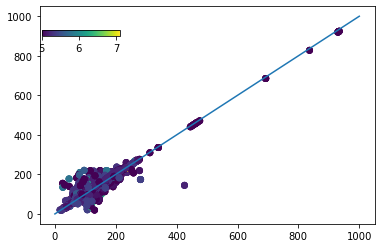

In [10]:
fig, ax = plt.subplots(1,1)
sc = ax.scatter(d_hyp, d_epi, c = m, cmap = 'viridis')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')
ax.plot([0, 1000],[0,1000])

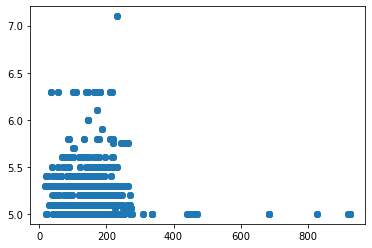

In [11]:
plt.scatter(d_epi,m)

In [12]:
dist

121.67880064748387

In [97]:
%conda install cartopy

.environ: No such file or directory.
Solving environment: done

## Package Plan ##

  environment location: /home/earthquakes1/software/Mageia8/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyshp-2.2.0                |     pyhd8ed1ab_0          42 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          42 KB

The following NEW packages will be INSTALLED:

  cartopy            pkgs/main/linux-64::cartopy-0.18.0-py39h0d9ca2b_1
  geos               pkgs/main/linux-64::geos-3.8.0-he6710b0_0
  proj               conda-forge/linux-64::proj-6.2.1-hc80f0dc_0
  pyshp              conda-forge/noarch::pyshp-2.2.0-pyhd8ed1ab_0
  shapely            pkgs/main/linux-64::shapely-1.7.1-py39h1728cc4_0



pyshp-2.2.0          | 42 KB     | ###############################

In [98]:
cat_with_data.plot()

ImportError: Neither Basemap nor Cartopy could be imported.

In [35]:
a = tr.copy()

In [37]:
start

32770

In [38]:
end

33070

In [36]:
a.trim(start, end)

IQ.UNAP..HHZ | 2018-01-24T07:35:58.220000Z - 2018-01-24T07:35:58.220000Z | 100.0 Hz, 0 samples

In [39]:
tr

IQ.UNAP..HHZ | 2018-01-24T07:40:58.210000Z - 2018-01-24T07:51:19.620000Z | 100.0 Hz, 62142 samples

In [79]:
column

'6.9'

onto row/column plot


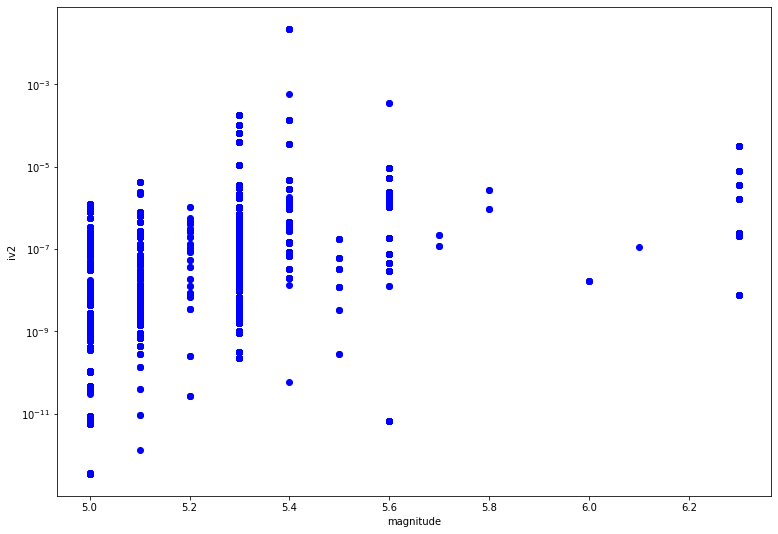

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(12.8,9))#iv2.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in iv2.columns[:-1]:
        for ind_ad in iv2[column][row]:
            axs.scatter(float(column), ind_ad, color='blue')
        #axs[row_count][col_count].set_xscale('log')
        #axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('iv2')
plt.xlabel('magnitude')
plt.yscale('log')
plt.show()

onto row/column plot


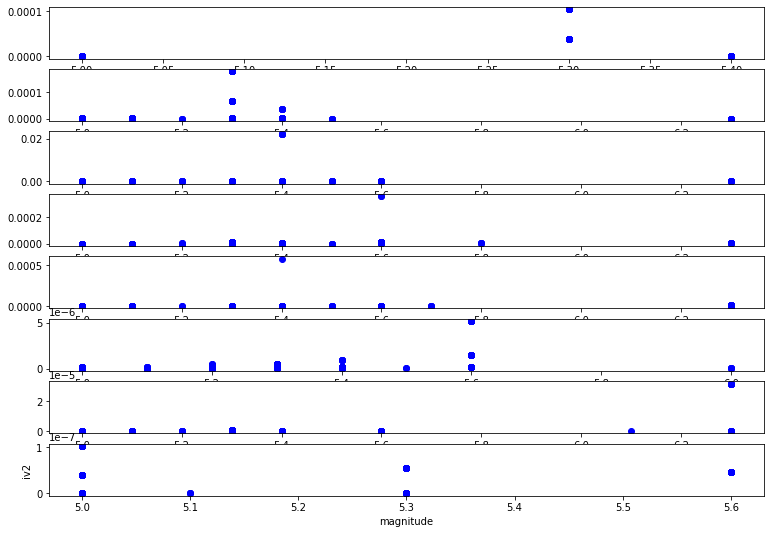

In [16]:
fig, axs = plt.subplots(8, 1, figsize=(12.8,9))#iv2.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in iv2.columns[:-1]:
        for ind_ad in iv2[column][row]:
            axs[row_count].scatter(float(column), ind_ad, color='blue')
        #axs[row_count][col_count].set_xscale('log')
        #axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('iv2')
plt.xlabel('magnitude')
plt.show()

In [89]:
m = [] 
for e in cat_with_data:
    m.append(e.magnitudes[0].mag)

In [88]:
e.magnitudes[0].mag

5.0

In [90]:
min(m)

5.0

In [91]:
max(m)

7.5